## **SVM Kernels Indepth Intution And Practical Explanations**

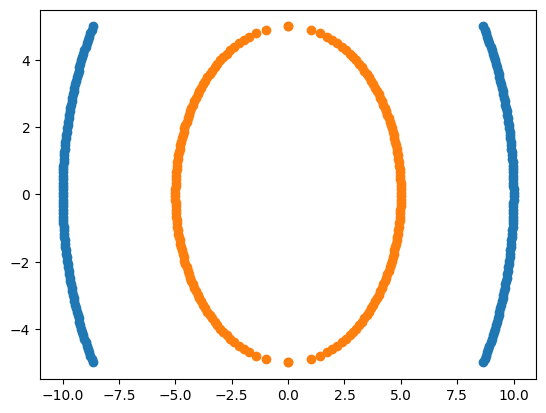

In [1]:
import numpy as np
from matplotlib import pyplot as plt

x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)

y=np.hstack([y,-y])
x=np.hstack([x,-x])

x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)

y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

plt.scatter(y,x)
plt.scatter(y1,x1)

In [6]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1

df=pd.concat([df1,df2])
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [7]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


## **Independent and Dependent Features**

In [8]:
X=df.iloc[:,:2]
Y=df.Y

In [9]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

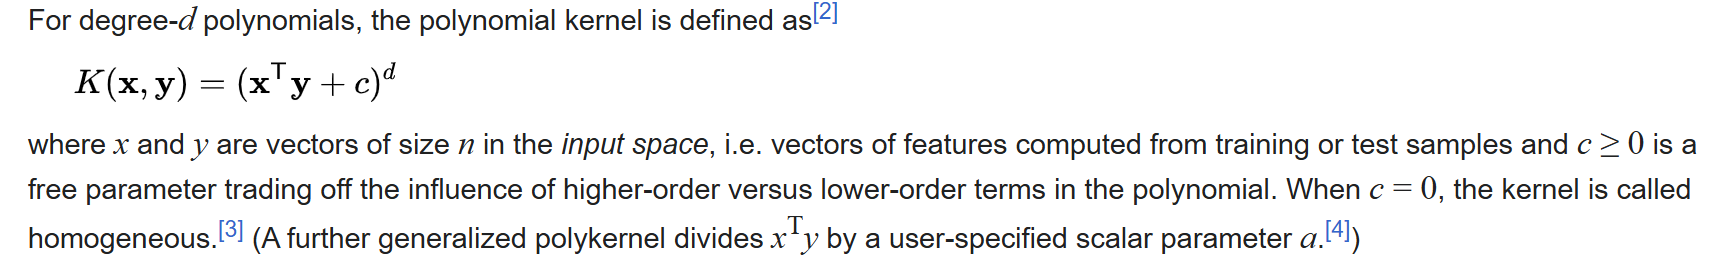

In [10]:
### We need to find components for the Polynomial Kernel
df["X1_Square"]=df["X1"]**2
df["X2_Square"]=df["X2"]**2
df["X1*X2"]=df["X1"]*df["X2"]
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [12]:
## Independent and Dependent Features
X=df[["X1","X2","X1_Square","X2_Square","X1*X2"]]
Y=df["Y"]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [14]:
x_train

,X1,X2,X1_Square,X2_Square,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [17]:
from plotly import express as px

px.scatter_3d(df,x=df["X1"],y=df["X2"],z=df["X1*X2"],color="Y")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'X1=%{x}<br>X2=%{y}<br>X1*X2=%{z}<br>Y=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('6y830QxSIUBFUglwgm8hQOSR0jEujC' ... 'LdsYL2v/sYuQKV/++/AAAAAAAAAIA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAFMBDYt7OkJgTwIbEvJ0hMR' ... 'ydITETwERi3s6QmBPAAAAAAAAAFMA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('5vuEBZCmRcA8YDcJrFpFwNB0wAZZDE' ... 'vDUgAbQOsQZUpPmBNAAAAAAAAAAAA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Y'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1'}},
                         'yaxis': {'title': {'text': 'X2'}},
                         'zaxis': {'title': {'text': 'X1*X2'}}},
               'template': '...'}
})

In [19]:
from plotly import express as px

px.scatter_3d(df,x=df["X1_Square"],y=df["X2_Square"],z=df["X1*X2"],color="Y")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('X1_Square=%{x}<br>X2_Square=%{' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('AQAAAADAUkDQrw1U/v9SQBS6zFKuPl' ... '6zlKv/P8Dn1wYq/+8/AAAAAAAAAAA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAOUDAQMmvBgA4QLAXzbRGBT' ... '20RgU3QMJAya8GADhAAAAAAAAAOUA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('5vuEBZCmRcA8YDcJrFpFwNB0wAZZDE' ... 'vDUgAbQOsQZUpPmBNAAAAAAAAAAAA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Y'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1_Square'}},
                         'yaxis': {'title': {'text': 'X2_Square'}},
                         'zaxis': {'title': {'text': 'X1*X2'}}},
               'template': '...'}
})

In [25]:
## Get accuracy report for different kernels

def print_accuracy_score(kernel_type):
    from sklearn.metrics import accuracy_score
    from sklearn.svm import SVC

    classifier=SVC(kernel=kernel_type)
    classifier.fit(x_train,y_train)

    y_pred=classifier.predict(x_test)
    print(f"Accuracy score of kernel type {kernel_type} is {accuracy_score(y_test,y_pred)}")


print_accuracy_score("linear")
print_accuracy_score("rbf")
print_accuracy_score("poly")
print_accuracy_score("sigmoid")

Accuracy score of kernel type linear is 1.0
Accuracy score of kernel type rbf is 1.0
Accuracy score of kernel type poly is 1.0
Accuracy score of kernel type sigmoid is 1.0
